# FMCSA Database Analysis

## Run this markdown before playing with the main analysis.

### Libraries

In [ ]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

### Functions

In [ ]:
def carrier_operation_codes(df_col):
    carrier_dict = {'A': 'Interstate', 'B': 'Intrastate Hazmat', 'C': 'Intrastate Non-Hazmat'}
    df_col = df_col.replace(carrier_dict)
    return df_col

def vmt_source_id_codes(df_col):
    vmt_dict = {1.0: 'Census', 2.0: 'Safety Audit', 3.0: 'Investigation'}
    df_col = df_col.replace(vmt_dict)
    return df_col

def cons_operation_category(df):
    carrier_operation_columns = ['PRIVATE_ONLY', 'AUTHORIZED_FOR_HIRE', 'EXEMPT_FOR_HIRE', 'PRIVATE_PROPERTY', 'PRIVATE_PASSENGER_BUSINESS', 'PRIVATE_PASSENGER_NONBUSINESS', 
                                 'MIGRANT', 'US_MAIL', 'FEDERAL_GOVERNMENT', 'STATE_GOVERNMENT', 'LOCAL_GOVERNMENT', 'INDIAN_TRIBE']
    df['CARRIER_OPERATION_LIST'] = df[carrier_operation_columns + ['OP_OTHER']].apply(
        lambda x: ';'.join(x.index[x != 'N']) + (';OP_OTHER: ' + str(x['OP_OTHER']) if x['OP_OTHER'] != 'N' else ''), axis = 1)
    return df

def state_abb_to_full(df_col):
    state_prov_dict = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AR': 'Arkansas', 
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut', 
        'DC': 'District of Columbia', 
        'DE': 'Delaware', 
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa', 
        'ID': 'Idaho',
        'IL': 'Illinois', 
        'IN': 'Indiana', 
        'KS': 'Kansas', 
        'KY': 'Kentucky',
        'LA': 'Louisiana', 
        'MA': 'Massachussetts', 
        'MD': 'Maryland', 
        'ME': 'Maine',
        'MI': 'Michigan', 
        'MN': 'Minnesota',
        'MO': 'Missouri', 
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina', 
        'ND': 'North Dakota',
        'NE': 'Nebraska', 
        'NH': 'New Hampshire', 
        'NJ': 'New Jersey', 
        'NM': 'New Mexico', 
        'NV': 'Nevada', 
        'NY': 'New York', 
        'OH': 'Ohio', 
        'OK': 'Oklahoma',
        'OR': 'Oregon', 
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island', 
        'SC': 'South Carolina',  
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas', 
        'UT': 'Utah',
        'VA': 'Virginia', 
        'VT': 'Vermont', 
        'WA': 'Washington', 
        'WI': 'Wisconsin',
        'WV': 'West Virginia', 
        'WY': 'Wyoming', 
        
        # Canadian Provinces
        'AB': 'Alberta', 
        'BC': 'British Columbia',
        'MB': 'Manitoba',
        'NB': 'New Brunswick', 
        'NF': 'Newfoundland',
        'NS': 'Nova Scotia',
        'NT': 'Northwest Territories', 
        'ON': 'Ontario', 
        'PE': 'Prince Edward Island',
        'QC': 'Quebec',
        'SK': 'Saskatchewan', 
        'YT': 'Yukon Territory', 
        
        # Mexico States
        'AG': 'Aguascalientes', 
        'BN': 'Baja California Norte',
        'BS': 'Baja California Sur',
        'CH': 'Coahuila',
        'CI': 'Chihuahua',
        'CL': 'Colima',
        'CP': 'Campeche', 
        'CS': 'Chiapas', 
        'DF': 'Districto Federal', 
        'DG': 'Durango', 
        'GE': 'Guerrero', 
        'GJ': 'Guanajuato',
        'HD': 'Hidalgo',
        'JA': 'Jalisco',  
        'MC': 'Michoacan',
        'MR': 'Morelos',
        'MX': 'Mexico',
        'NA': 'Nayarit',
        'NL': 'Nuevo Leon',
        'OA': 'Oaxaca',
        'PU': 'Puebla', 
        'QE': 'Queretaro', 
        'QI': 'Quintana Roo', 
        'SI': 'Sinaloa',
        'SL': 'San Luis Potosi',
        'SO': 'Sonora',
        'TA': 'Tamaulipas',
        'TB': 'Tabasco',
        'TL': 'Tlaxcala',
        'VC': 'Veracruz',
        'YU': 'Yucatan',
        'ZA': 'Zacatecas',  

        # Central American Countries
        'BZ': 'Belize',  
        'CR': 'Costa Rica', 
        'CZ': 'Canal Zone',
        'SV': 'El Salvador',
        'GT': 'Guatemala',
        'HN': 'Honduras', 
        'NI': 'Nicaragua', 
         
        # American Possessions or Protecectorates
        'AS': 'American Samoa',
        'GU': 'Guam', 
        'MP': 'Northern Marianas', 
        'PR': 'Puerto Rico',
        'VI': 'Virgin Islands',

        # Unknowns
        'DO': 'DO', 
        'FJ': 'FJ',
        'GB': 'GB', 
        'KW': 'KW',
        'OT': 'Other',
        'UK': 'NaN',
        'ZZ': 'NaN',
    }

    df_col = df_col.replace(state_prov_dict)
    return df_col
        
def country_abb_to_full(df_col):
    country_dict = {
        'US': 'United States',
        'MX': 'Mexico',
        'CA': 'Canada',
        'SV': 'El Salvador',
        'GT': 'Guatemala', 
        'BZ': 'Belize',
        'NI': 'Nicaragua',
        'CR': 'Costa Rica',
        'HN': 'Honduras',
        'GB': 'GB', 
        'KW': 'KW', 
        'DO': 'DO', 
        'IN': 'IN', 
        'FJ': 'FJ'
    }

    df_col = df_col.replace(country_dict)
    return df_col

### ETL - Extract, Transform, and Load

##### Extracting data from csv file into Pandas dataframe.

In [5]:
tfr = pd.read_csv('FMCSA_CENSUS1_2025Feb.txt', sep = ',', encoding = 'windows-1252', iterator = True, chunksize = 100000)   
df = pd.concat(tfr, ignore_index = True)

##### Transforming data based on readability.

In [ ]:
df['CARRIER_OPERATION'] = carrier_operation_codes(df['CARRIER_OPERATION'])
df['VMT_SOURCE_ID'] = vmt_source_id_codes(df['VMT_SOURCE_ID'])
df['PHY_STATE'], df['MAILING_STATE'], df['OIC_STATE'] = state_abb_to_full(df['PHY_STATE']), state_abb_to_full(df['MAILING_STATE']), state_abb_to_full(df['OIC_STATE'])
df['PHY_COUNTRY'], df['MAILING_COUNTRY'] = country_abb_to_full(df['PHY_COUNTRY']), country_abb_to_full(df['MAILING_COUNTRY'])
df = cons_operation_category(df)

##### Loading data into each dataframe. Can index dataframes on 'DOT_NUMBER' field.

In [ ]:
df_general = df[['DOT_NUMBER', 'LEGAL_NAME', 'DBA_NAME', 'CARRIER_OPERATION', 'ADD_DATE', 'OIC_STATE', 'NBR_POWER_UNIT', 'DRIVER_TOTAL']]
df_phy_address = df[['DOT_NUMBER', 'PHY_STREET', 'PHY_CITY', 'PHY_STATE', 'PHY_ZIP', 'PHY_COUNTRY']]
df_mailing_address = df[['DOT_NUMBER', 'MAILING_STREET', 'MAILING_CITY', 'MAILING_STATE', 'MAILING_ZIP', 'MAILING_COUNTRY']]
df_contact = df[['DOT_NUMBER', 'TELEPHONE', 'EMAIL_ADDRESS']]
df_mcs150 = df[['DOT_NUMBER', 'MCS150_DATE', 'MCS150_MILEAGE', 'MCS150_MILEAGE_YEAR']]
df_vmt = df[['DOT_NUMBER', 'RECENT_MILEAGE', 'RECENT_MILEAGE_YEAR', 'VMT_SOURCE_ID']]
df_carrier_class = df[['DOT_NUMBER', 'CARRIER_OPERATION_LIST', 'PRIVATE_ONLY', 'AUTHORIZED_FOR_HIRE', 'EXEMPT_FOR_HIRE', 'PRIVATE_PROPERTY', 'PRIVATE_PASSENGER_BUSINESS',
                      'PRIVATE_PASSENGER_NONBUSINESS', 'MIGRANT', 'US_MAIL', 'FEDERAL_GOVERNMENT', 'STATE_GOVERNMENT', 'LOCAL_GOVERNMENT', 'INDIAN_TRIBE', 'OP_OTHER']]

## SQL & Pandas

In [131]:
import pypyodbc as odbc

DRIVER_NAME='SQL Server'
SERVER_NAME='DESKTOP-ENFJAEK'
DATABASE_NAME='TC'

# uid=<username>;
# pwd=<password>;
connection_string = f"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection=yes;
"""

conn = odbc.connect(connection_string)
print(conn)

## Matplot, Seaborn, and Pandas

In [98]:
matplt_df = df_general.merge(df_phy_address, on = 'DOT_NUMBER', how = 'inner')
matplt_df = matplt_df.dropna(subset = ['PHY_STATE'])
matplt_df = matplt_df[matplt_df['PHY_COUNTRY'] == 'United States']
matplt_df = matplt_df[~matplt_df['PHY_STATE'].isin(['Puerto Rico', 'Virgin Islands', 'Northern Marianas', 'Guam', 'American Samoa'])] # Removes rows with the following values.
matplt_df['ADD_DATE'] = pd.to_datetime(matplt_df['ADD_DATE'])
matplt_df = matplt_df.sort_values(by = 'PHY_STATE')

C:\Users\Jaewo\AppData\Local\Temp\ipykernel_2824\1503140196.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matplt_df['ADD_DATE'] = pd.to_datetime(matplt_df['ADD_DATE'])


#### Transforming and loading in a dataframe matrix specifically for seaborn heat mapping.

In [ ]:
data = {
    'state': list(matplt_df['PHY_STATE'].unique()),
    # 'record_count': [matplt_df[matplt_df['PHY_STATE'] == count].shape[0] for count in matplt_df['PHY_STATE'].unique()]
}
data_df = pd.DataFrame(data)

for i in range(2024, 2006, -1):
    yearly_counts = []
    for j in matplt_df['PHY_STATE'].unique():
        count = matplt_df[(matplt_df['PHY_STATE'] == j) & (matplt_df['ADD_DATE'].dt.year == i)].shape[0]
        yearly_counts.append(count)
    data_df[i] = yearly_counts

data_df.set_index('state', inplace = True)

##### Heatmap matrix of the United States based on the total FMCSA US records. Data is based on the number of records for each state and the date their record was added into the FMCSA database.

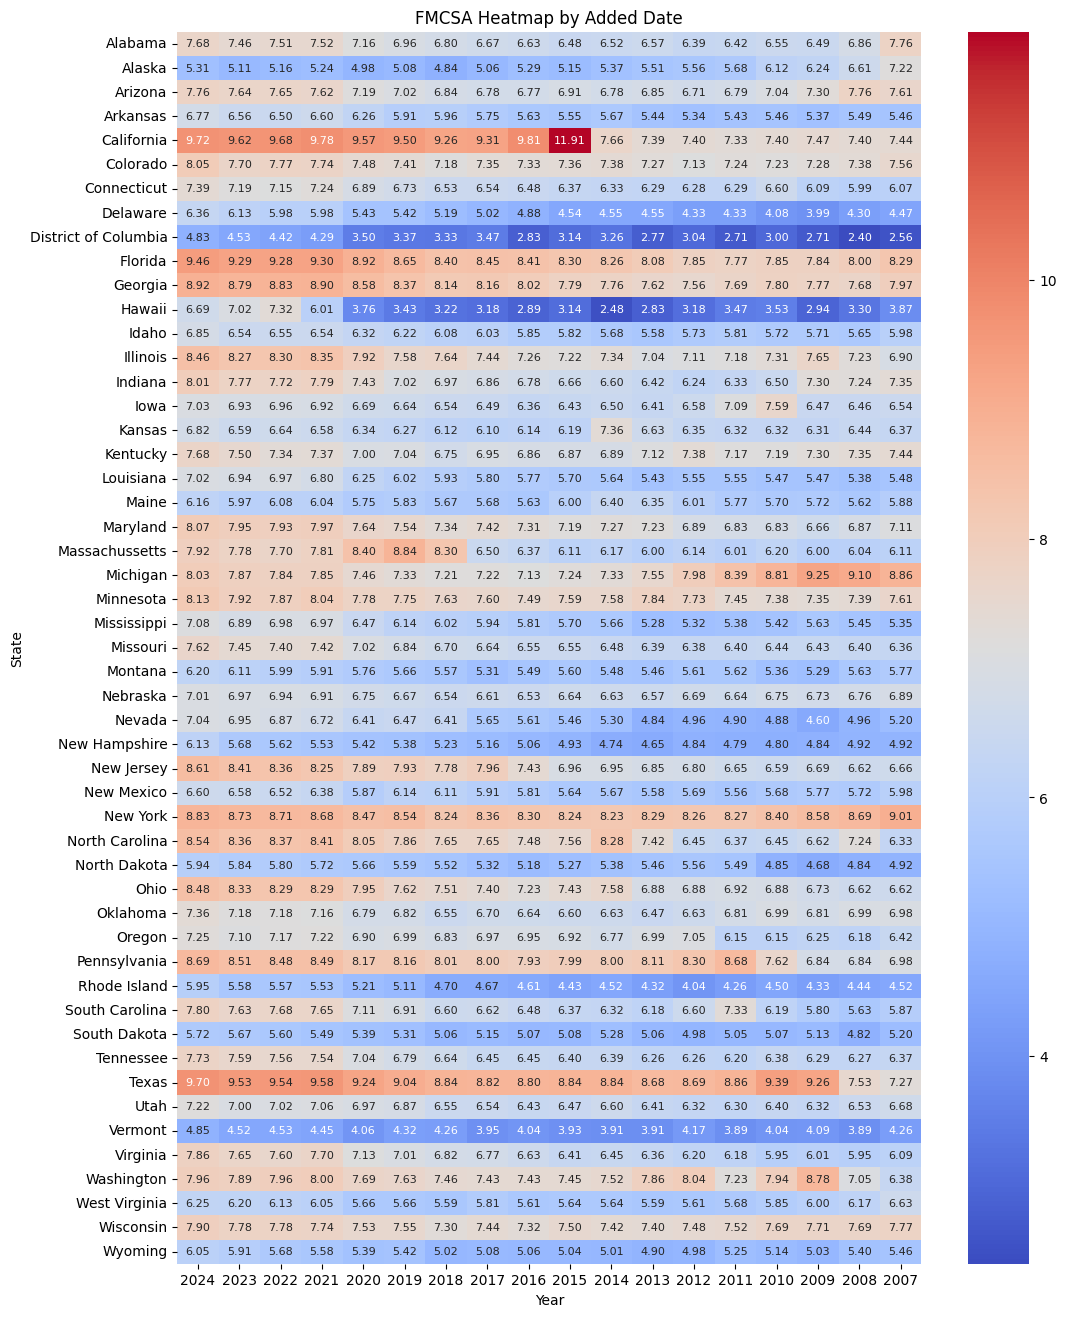

In [97]:
log_data_df = np.log1p(data_df)

plt.figure(figsize = (12, 16))
sns.heatmap(log_data_df, annot = True, fmt = '.2f', cmap = 'coolwarm', annot_kws = {'size': 8})
plt.title('FMCSA Heatmap by Added Date')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

#### Analysis of top states by number of FMCSA records, countey by 'PHY_STATE', using matplotlib bar chart.

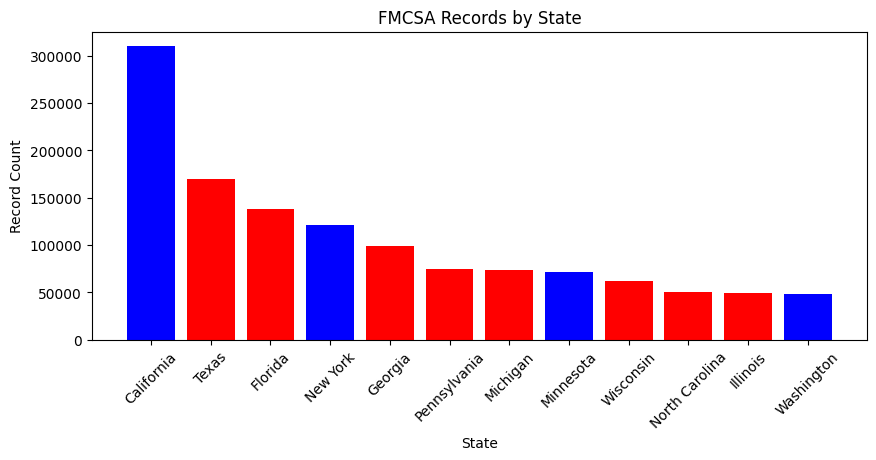

In [32]:
data = {
    'state': list(matplt_df['PHY_STATE'].unique()),
    'record_count': [matplt_df[matplt_df['PHY_STATE'] == count].shape[0] for count in matplt_df['PHY_STATE'].unique()]}
data_df = pd.DataFrame(data)
data_df = data_df.nlargest(12, 'record_count')

state_colors = {'California': 'blue', 'New York': 'blue', 'Minnesota': 'blue', 'Washington': 'blue', 
               'Texas': 'red', 'Florida': 'red', 'Georgia': 'red', 'Pennsylvania': 'red', 'Michigan': 'red', 'Wisconsin': 'red', 'North Carolina': 'red', 'Illinois': 'red'}

assign_colors = []
for i in data_df['state'].tolist():
    assign_colors.append(state_colors[i])

plt.bar(data_df['state'], data_df['record_count'], color = assign_colors)
plt.title('FMCSA Records by State')
plt.xlabel('State'), plt.xticks(rotation = 45)
plt.ylabel('Record Count')
plt.rcParams['figure.figsize'] = (10, 6)
plt.show()
